In [1]:
# IG fraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py 
drv, _ = which_computer()

In [2]:
def calc_L0(Tp = 10.):
    L0 = (9.81*Tp**2)/(2.*np.pi)
    return L0

In [3]:
# range of beach slopes
# conditions for 95th HoLo per Alfredo email
H0=1.
nt = 8
ns = 3
Tp=np.linspace(5.,12.,nt)
Bf = np.array((.052, .103, .153))
print(Tp)

[ 5.  6.  7.  8.  9. 10. 11. 12.]


In [4]:
setup = np.zeros((ns,nt))
Sig = np.zeros_like(setup)
Sinc = np.zeros_like(setup)
fsetup = np.zeros((ns,nt))
fSig = np.zeros_like(setup)
fSinc = np.zeros_like(setup)
R2 = np.zeros_like(setup)
H0L0 = np.zeros_like(setup)
for i in range(ns):
    Beta = Bf[i]
    for j, T in enumerate(Tp):
        L0 = calc_L0(T)
        H0L0[i,j]=H0*L0
        Ir = Beta/np.sqrt(H0/L0)
        setup[i,j] = 0.35*Beta*np.sqrt(H0*L0)
        Sinc[i,j] = 0.75*Beta*np.sqrt(H0*L0)
        Sig[i,j] = 0.06*np.sqrt(H0*L0)
        S = np.sqrt(Sinc[i,j]**2+Sig[i,j]**2)

        R2[i,j] = 1.1*(setup[i,j]+0.5*S)
        fSinc[i,j]=1.1*0.5*Sinc[i,j]
        fSig[i,j]=1.1*0.5*Sig[i,j]
        fsetup[i,j]=1.1*setup[i,j]



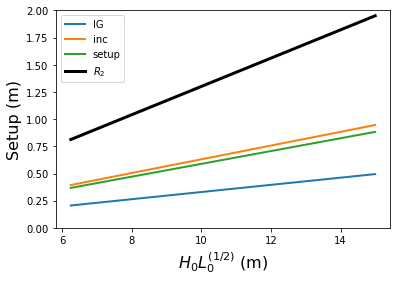

In [10]:

cols = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
i = 2
plt.plot(np.sqrt(H0L0[i,:]),fSig[i,:],'-',linewidth=2,label='IG')
plt.plot(np.sqrt(H0L0[i,:]),fSinc[i,:],'-',linewidth=2,label='inc')
plt.plot(np.sqrt(H0L0[i,:]),fsetup[i,:],'-',linewidth=2,label='setup')
plt.plot(np.sqrt(H0L0[i,:]),R2[i,:],'-',linewidth=3,c='k',label=r'$R_2$')
plt.legend()
plt.ylim([0., 2])
plt.ylabel(r'Setup (m)',fontsize=16)
plt.xlabel(r'$H_0L_0^{(1/2)}$ (m)',fontsize=16)
plt.savefig('C:/crs/proj/2022_Runup/stockdon_v_holo.svg', bbox_inches = "tight", dpi=200)

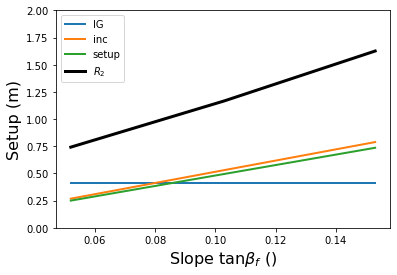

In [11]:
i = 5
plt.plot(Bf[:],fSig[:,i],'-',linewidth=2,label='IG')
plt.plot(Bf[:],fSinc[:,i],'-',linewidth=2,label='inc')
plt.plot(Bf[:],fsetup[:,i],'-',linewidth=2,label='setup')
plt.plot(Bf[:],R2[:,i],'-',linewidth=3,c='k',label=r'$R_2$')
plt.legend()
plt.ylim([0., 2])
plt.ylabel(r'Setup (m)',fontsize=16)
plt.xlabel(r'Slope tan$\beta_f$ ()',fontsize=16)
plt.savefig('C:/crs/proj/2022_Runup/stockdon_v_slope.svg',bbox_inches = "tight", dpi=200)

In [7]:
np.mean(fSig[2,:]/R2[2,:])

0.25360368390043553